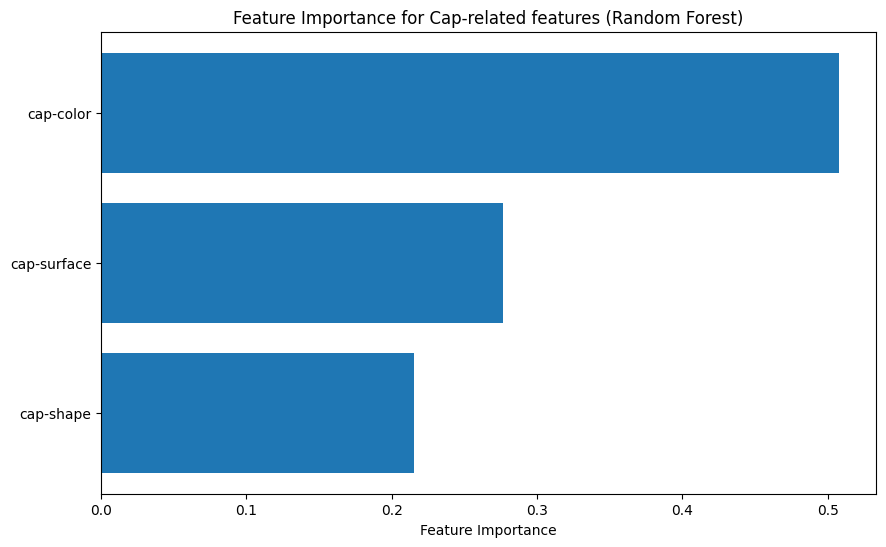

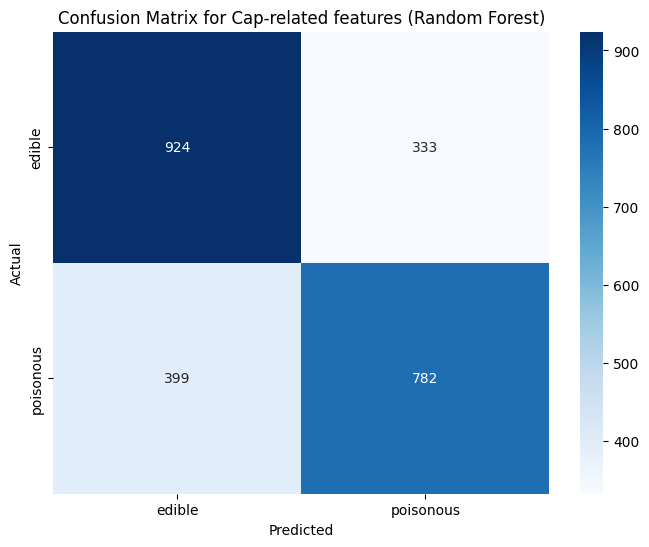

Classification report for predictions using Cap-related features (Random Forest):
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1257
           1       0.70      0.66      0.68      1181

    accuracy                           0.70      2438
   macro avg       0.70      0.70      0.70      2438
weighted avg       0.70      0.70      0.70      2438



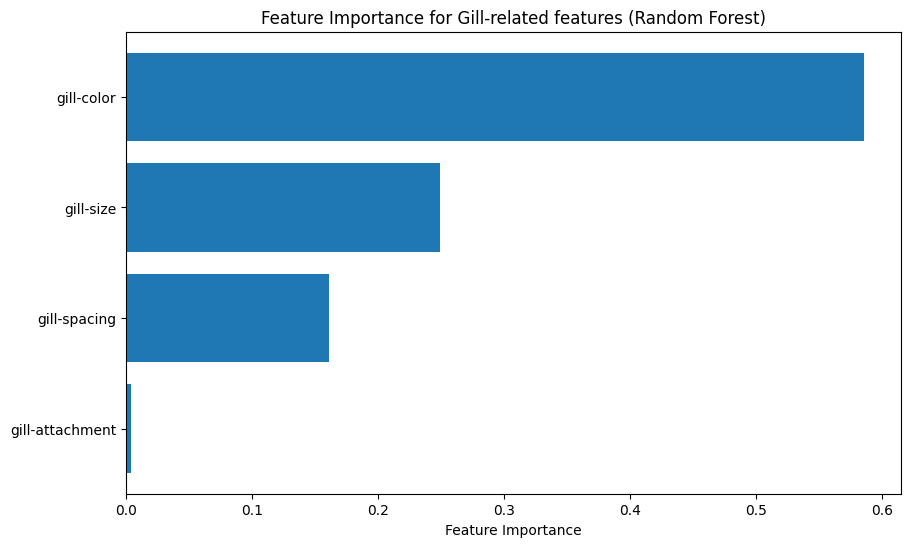

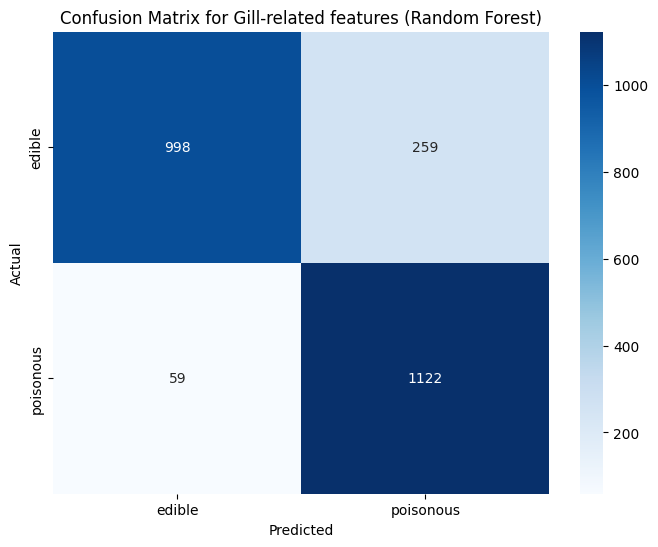

Classification report for predictions using Gill-related features (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1257
           1       0.81      0.95      0.88      1181

    accuracy                           0.87      2438
   macro avg       0.88      0.87      0.87      2438
weighted avg       0.88      0.87      0.87      2438



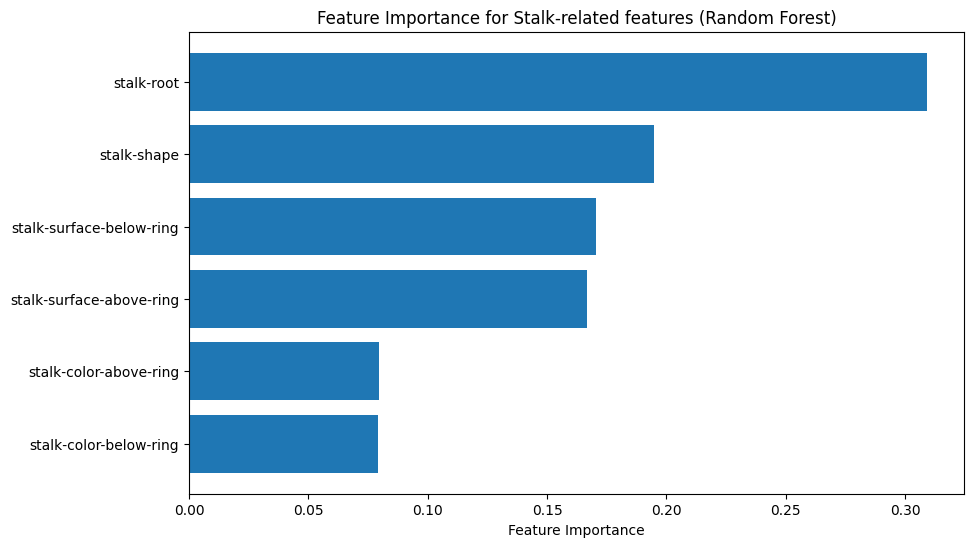

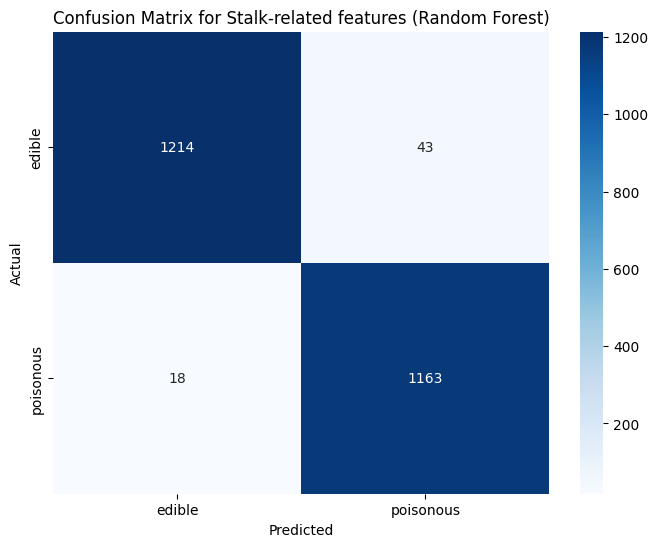

Classification report for predictions using Stalk-related features (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1257
           1       0.96      0.98      0.97      1181

    accuracy                           0.97      2438
   macro avg       0.97      0.98      0.97      2438
weighted avg       0.98      0.97      0.97      2438



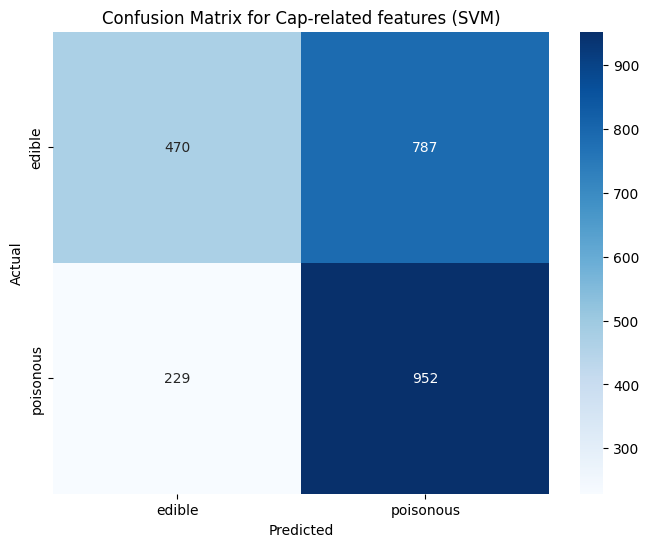

Classification report for predictions using Cap-related features (SVM):
              precision    recall  f1-score   support

           0       0.67      0.37      0.48      1257
           1       0.55      0.81      0.65      1181

    accuracy                           0.58      2438
   macro avg       0.61      0.59      0.57      2438
weighted avg       0.61      0.58      0.56      2438



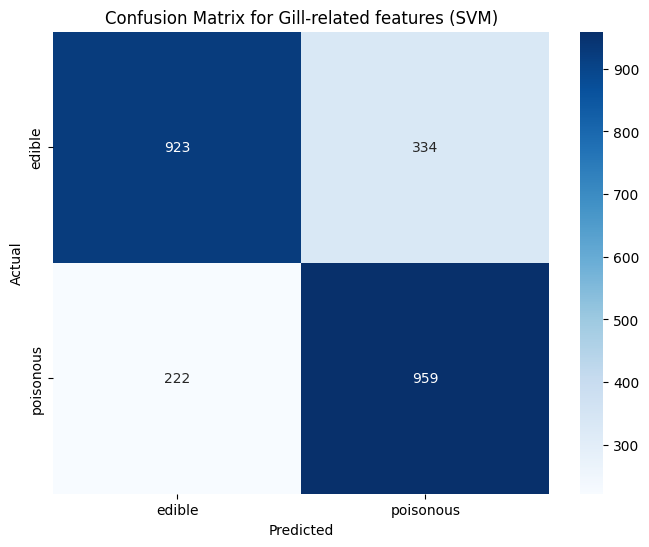

Classification report for predictions using Gill-related features (SVM):
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1257
           1       0.74      0.81      0.78      1181

    accuracy                           0.77      2438
   macro avg       0.77      0.77      0.77      2438
weighted avg       0.77      0.77      0.77      2438



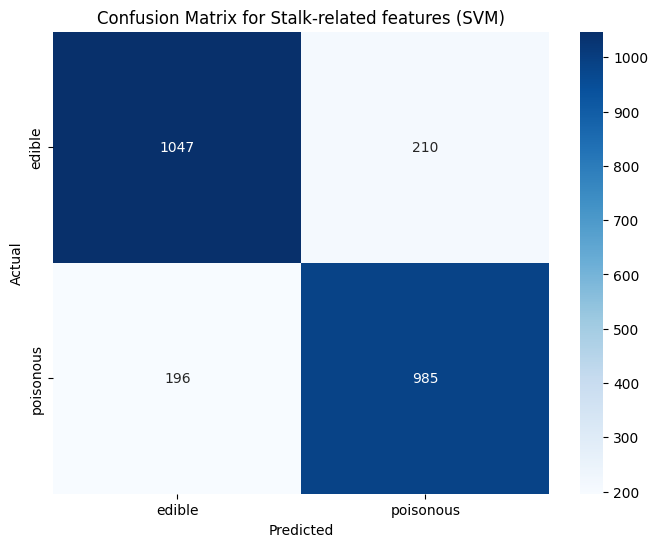

Classification report for predictions using Stalk-related features (SVM):
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1257
           1       0.82      0.83      0.83      1181

    accuracy                           0.83      2438
   macro avg       0.83      0.83      0.83      2438
weighted avg       0.83      0.83      0.83      2438



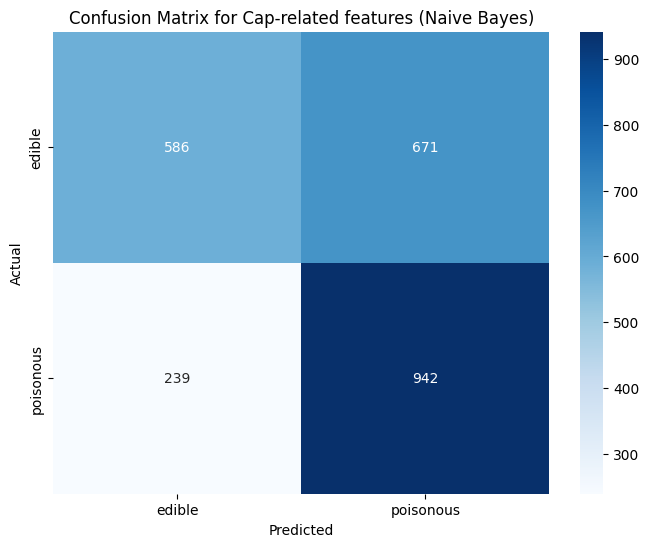

Classification report for predictions using Cap-related features (Naive Bayes):
              precision    recall  f1-score   support

           0       0.71      0.47      0.56      1257
           1       0.58      0.80      0.67      1181

    accuracy                           0.63      2438
   macro avg       0.65      0.63      0.62      2438
weighted avg       0.65      0.63      0.62      2438



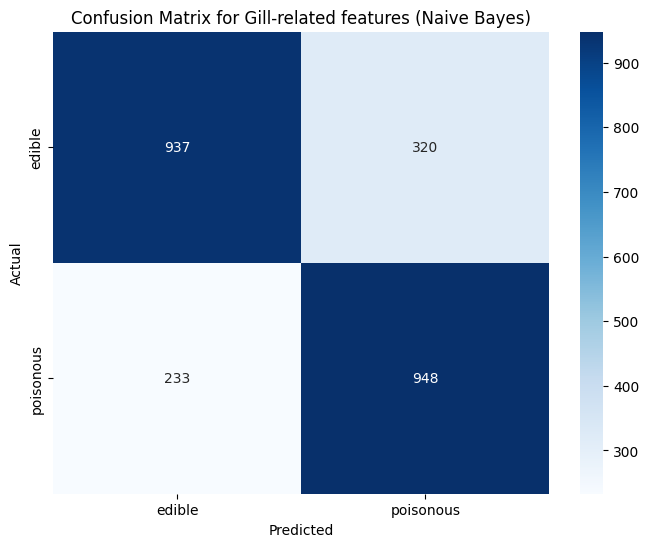

Classification report for predictions using Gill-related features (Naive Bayes):
              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1257
           1       0.75      0.80      0.77      1181

    accuracy                           0.77      2438
   macro avg       0.77      0.77      0.77      2438
weighted avg       0.78      0.77      0.77      2438



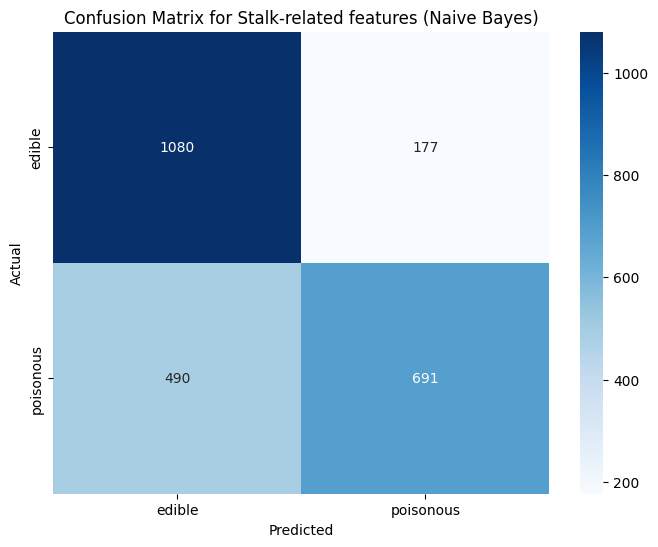

Classification report for predictions using Stalk-related features (Naive Bayes):
              precision    recall  f1-score   support

           0       0.69      0.86      0.76      1257
           1       0.80      0.59      0.67      1181

    accuracy                           0.73      2438
   macro avg       0.74      0.72      0.72      2438
weighted avg       0.74      0.73      0.72      2438



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("mushrooms.csv")

# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df.columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split into X = features, y = classes/labels
y = df['class']
X = df.drop(['class'], axis=1)

def run_random_forest(X, y, feature_name):
    # Select subset of features
    if feature_name == "Cap-related features":
        X_selected = X[['cap-shape', 'cap-surface', 'cap-color']]
    elif feature_name == "Gill-related features":
        X_selected = X[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
    elif feature_name == "Stalk-related features":
        X_selected = X[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                       'stalk-color-above-ring', 'stalk-color-below-ring']]
    else:
        raise ValueError("Invalid feature_name")

    # Split into training and testing set in the ratio 7:3
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=True, random_state=42)

    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    rf_classifier.fit(X_train, y_train)

    # Predict classes using the trained model
    y_pred = rf_classifier.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Plot feature importance
    feature_importance = rf_classifier.feature_importances_
    sorted_idx = feature_importance.argsort()
    plt.figure(figsize=(10, 6))
    plt.barh(X_selected.columns[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance for {feature_name} (Random Forest)")
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix for {feature_name} (Random Forest)")
    plt.show()

    return report

def run_svm(X, y, feature_name):
    # Select subset of features
    if feature_name == "Cap-related features":
        X_selected = X[['cap-shape', 'cap-surface', 'cap-color']]
    elif feature_name == "Gill-related features":
        X_selected = X[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
    elif feature_name == "Stalk-related features":
        X_selected = X[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                       'stalk-color-above-ring', 'stalk-color-below-ring']]
    else:
        raise ValueError("Invalid feature_name")

    # Split into training and testing set in the ratio 7:3
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=True, random_state=42)

    # Initialize the SVM classifier
    svm_classifier = SVC(kernel='linear', random_state=42)

    # Train the model
    svm_classifier.fit(X_train, y_train)

    # Predict classes using the trained model
    y_pred = svm_classifier.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix for {feature_name} (SVM)")
    plt.show()

    return report

def run_naive_bayes(X, y, feature_name):
    # Select subset of features
    if feature_name == "Cap-related features":
        X_selected = X[['cap-shape', 'cap-surface', 'cap-color']]
    elif feature_name == "Gill-related features":
        X_selected = X[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
    elif feature_name == "Stalk-related features":
        X_selected = X[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                       'stalk-color-above-ring', 'stalk-color-below-ring']]
    else:
        raise ValueError("Invalid feature_name")

    # Split into training and testing set in the ratio 7:3
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, shuffle=True, random_state=42)

    # Create a Gaussian Naive Bayes Classifier
    nb_classifier = GaussianNB()

    # Train the model
    nb_classifier.fit(X_train, y_train)

    # Predict classes using the trained model
    y_pred = nb_classifier.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix for {feature_name} (Naive Bayes)")
    plt.show()

    return report

# Define subsets of features
X_cap = X[['cap-shape', 'cap-surface', 'cap-color']]
X_gill = X[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
X_stalk = X[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
             'stalk-color-above-ring', 'stalk-color-below-ring']]

# Run Random Forest on Cap-related features
rf_cap = run_random_forest(X_cap, y, "Cap-related features")
print("Classification report for predictions using Cap-related features (Random Forest):")
print(rf_cap)

# Run Random Forest on Gill-related features
rf_gill = run_random_forest(X_gill, y, "Gill-related features")
print("Classification report for predictions using Gill-related features (Random Forest):")
print(rf_gill)

# Run Random Forest on Stalk-related features
rf_stalk = run_random_forest(X_stalk, y, "Stalk-related features")
print("Classification report for predictions using Stalk-related features (Random Forest):")
print(rf_stalk)

# Run SVM on Cap-related features
svm_cap = run_svm(X_cap, y, "Cap-related features")
print("Classification report for predictions using Cap-related features (SVM):")
print(svm_cap)

# Run SVM on Gill-related features
svm_gill = run_svm(X_gill, y, "Gill-related features")
print("Classification report for predictions using Gill-related features (SVM):")
print(svm_gill)

# Run SVM on Stalk-related features
svm_stalk = run_svm(X_stalk, y, "Stalk-related features")
print("Classification report for predictions using Stalk-related features (SVM):")
print(svm_stalk)

# Run Naive Bayes on Cap-related features
nb_cap = run_naive_bayes(X_cap, y, "Cap-related features")
print("Classification report for predictions using Cap-related features (Naive Bayes):")
print(nb_cap)

# Run Naive Bayes on Gill-related features
nb_gill = run_naive_bayes(X_gill, y, "Gill-related features")
print("Classification report for predictions using Gill-related features (Naive Bayes):")
print(nb_gill)

# Run Naive Bayes on Stalk-related features
nb_stalk = run_naive_bayes(X_stalk, y, "Stalk-related features")
print("Classification report for predictions using Stalk-related features (Naive Bayes):")
print(nb_stalk)